# Unit 5 - Financial Planning

In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [26]:
# Fetch current BTC price
btc_data = requests.get(btc_url)

btc_data = btc_data.json()

# print(json.dumps(btc_data, indent = 4)) to identify the data dump structure

btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url)

eth_data = eth_data.json()

# print(json.dumps(eth_data, indent = 4)) to identify the data dump structure

eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69096.03
The current value of your 5.3 ETH is $16104.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [27]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [28]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(api_key, secret_key, api_version = 'v2')

In [42]:
# Format current date as ISO format
today = pd.Timestamp('2023-12-15', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

tickers_df = api.get_bars(tickers, timeframe, start = today, end = today).df

tickers_df['symbol']

# Reorganize the DataFrame
# Separate ticker data

agg_df = tickers_df[tickers_df['symbol'] == "AGG"].drop('symbol',axis=1)
spy_df = tickers_df[tickers_df['symbol'] == "SPY"].drop('symbol',axis=1)   

# Concatenate the ticker DataFrames

new_tickers_df = pd.concat([agg_df, spy_df], axis = 1, keys=['AGG','SPY'])

# Preview DataFrame

new_tickers_df

AGG                                            \
                           close   high    low trade_count  open    volume   
timestamp                                                                    
2023-12-15 05:00:00+00:00  98.69  98.88  98.59       37771  98.8  10079203   

                                         SPY                               \
                                vwap   close   high       low trade_count   
timestamp                                                                   
2023-12-15 05:00:00+00:00  98.733271  469.33  470.7  467.4263      667849   

                                                         
                             open     volume       vwap  
timestamp                                                
2023-12-15 05:00:00+00:00  469.49  141529826  469.34935

In [44]:
# Pick AGG and SPY close prices
agg_close_price = float(new_tickers_df['AGG']['close'])
spy_close_price = float(new_tickers_df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.69
Current SPY closing price: $469.33


/var/folders/b4/nwyh_6kj28dd26y5dl7g8tq00000gn/T/ipykernel_13443/125571023.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(new_tickers_df['AGG']['close'])
/var/folders/b4/nwyh_6kj28dd26y5dl7g8tq00000gn/T/ipykernel_13443/125571023.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(new_tickers_df['SPY']['close'])


In [45]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23466.50
The current value of your 200 AGG shares is $19738.00


### Savings Health Analysis

In [51]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares_total = round(my_spy_value+my_agg_value,2)
crypto_total = round(my_eth_value+my_btc_value,2)

savings_dict = {'amount':[crypto_total,shares_total]}

# Create savings DataFrame
df_savings = pd.DataFrame(savings_dict, index = ['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,85200.31
shares,43204.50


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

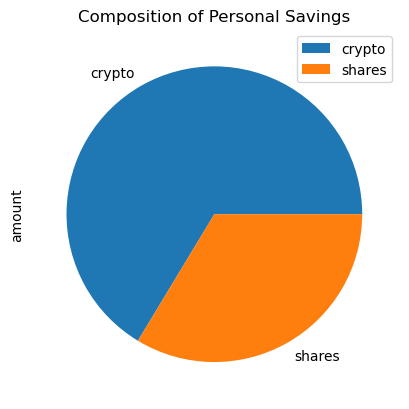

In [53]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount',title = 'Composition of Personal Savings')

In [55]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial saving's goal.")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching your financial saving's goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [56]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-12-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-17', tz='America/New_York').isoformat()

In [58]:
# Get 5 years' worth of historical data for SPY and AGG
tickers_5yr_df = api.get_bars(tickers, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
agg_5yr_df = tickers_5yr_df[tickers_5yr_df['symbol']=='AGG'].drop('symbol', axis=1)

spy_5yr_df = tickers_5yr_df[tickers_5yr_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_5yr_df, spy_5yr_df], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2018-12-03 05:00:00+00:00  104.80  104.8600  104.6300       23611  104.69   
2018-12-04 05:00:00+00:00  105.08  105.2799  104.9400       14725  104.98   
2018-12-06 05:00:00+00:00  105.34  105.5400  105.2800       19148  105.29   
2018-12-07 05:00:00+00:00  105.48  105.5500  105.2800       15653  105.39   
2018-12-10 05:00:00+00:00  105.55  105.6300  105.4300       16703  105.55   
...                           ...       ...       ...         ...     ...   
2023-12-11 05:00:00+00:00   96.90   96.9500   96.6000       40934   96.80   
2023-12-12 05:00:00+00:00   97.19   97.1900   96.8213       33503   96.94   
2023-12-13 05:00:00+00:00   98.41   98.4500   97.3299       38882   97.39   
2023-12-14 05:00:00+00:00   98.92   99.0400   98.6102       40679   98.68   
2023-12-15 05:00:00+00:00   98.69   98.8800   98.5900       37771   98.80   

                                                    SPY                      \
                             volume        vwap   close      high       low   
timestamp                                                                     
2018-12-03 05:00:00+00:00  14320801  104.768468  279.26  280.4000  277.5050   
2018-12-04 05:00:00+00:00   5971915  105.085107  270.39  278.8500  269.9000   
2018-12-06 05:00:00+00:00   7665752  105.374036  269.77  269.9700  262.4400   
2018-12-07 05:00:00+00:00   5641771  105.448449  263.66  271.2200  262.6300   
2018-12-10 05:00:00+00:00   6301706  105.521386  264.07  265.1613  258.6200   
...                             ...         ...     ...       ...       ...   
2023-12-11 05:00:00+00:00  15008723   96.808225  461.99  462.1700  459.4700   
2023-12-12 05:00:00+00:00  11711463   97.080235  464.10  464.2000  460.6000   
2023-12-13 05:00:00+00:00  11194420   97.924393  470.50  470.7599  464.1200   
2023-12-14 05:00:00+00:00  12651257   98.822324  472.01  473.7300  469.2500   
2023-12-15 05:00:00+00:00  10079203   98.733271  469.33  470.7000  467.4263   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-12-03 05:00:00+00:00      473013  280.28  104690284  278.951299  
2018-12-04 05:00:00+00:00      864734  278.37  182203555  272.918990  
2018-12-06 05:00:00+00:00     1061720  265.92  207107459  266.618323  
2018-12-07 05:00:00+00:00      869798  269.46  163396256  265.648060  
2018-12-10 05:00:00+00:00      937170  263.37  153231653  262.218801  
...                               ...     ...        ...         ...  
2023-12-11 05:00:00+00:00      461247  459.69   65803711  460.936716  
2023-12-12 05:00:00+00:00      438136  461.63   68329617  462.917041  
2023-12-13 05:00:00+00:00      662497  464.49   93277960  467.562717  
2023-12-14 05:00:00+00:00      713141  472.50  119028953  471.704958  
2023-12-15 05:00:00+00:00      667849  469.49  141529826  469.349350  

[1268 rows x 14 columns]

In [70]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [71]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2018-12-03 05:00:00+00:00  104.80  104.8600  104.63       23611  104.69   
2018-12-04 05:00:00+00:00  105.08  105.2799  104.94       14725  104.98   
2018-12-06 05:00:00+00:00  105.34  105.5400  105.28       19148  105.29   
2018-12-07 05:00:00+00:00  105.48  105.5500  105.28       15653  105.39   
2018-12-10 05:00:00+00:00  105.55  105.6300  105.43       16703  105.55   

                                                                 SPY  \
                             volume        vwap daily_return   close   
timestamp                                                              
2018-12-03 05:00:00+00:00  14320801  104.768468          NaN  279.26   
2018-12-04 05:00:00+00:00   5971915  105.085107     0.002672  270.39   
2018-12-06 05:00:00+00:00   7665752  105.374036     0.002474  269.77   
2018-12-07 05:00:00+00:00   5641771  105.448449     0.001329  263.66   
2018-12-10 05:00:00+00:00   6301706  105.521386     0.000664  264.07   

                                                                             \
                               high      low trade_count    open     volume   
timestamp                                                                     
2018-12-03 05:00:00+00:00  280.4000  277.505      473013  280.28  104690284   
2018-12-04 05:00:00+00:00  278.8500  269.900      864734  278.37  182203555   
2018-12-06 05:00:00+00:00  269.9700  262.440     1061720  265.92  207107459   
2018-12-07 05:00:00+00:00  271.2200  262.630      869798  269.46  163396256   
2018-12-10 05:00:00+00:00  265.1613  258.620      937170  263.37  153231653   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-12-03 05:00:00+00:00  278.951299          NaN  
2018-12-04 05:00:00+00:00  272.918990    -0.031763  
2018-12-06 05:00:00+00:00  266.618323    -0.002293  
2018-12-07 05:00:00+00:00  265.648060    -0.022649  
2018-12-10 05:00:00+00:00  262.218801     0.001555

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

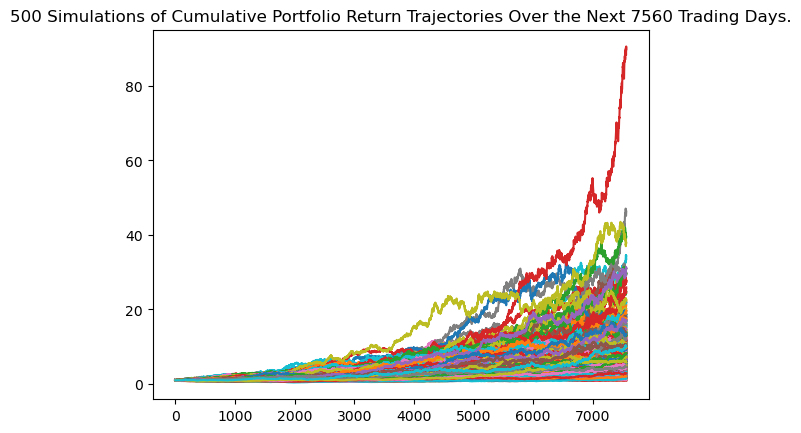

In [72]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

# Plot simulation outcomes
MC_30years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

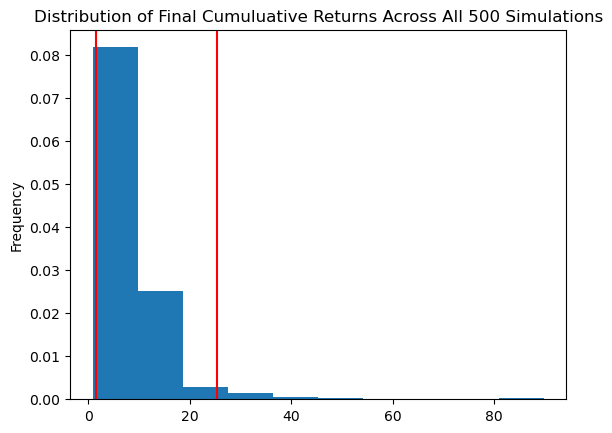

In [74]:
# Plot probability distribution and confidence intervals
MC_30years.plot_distribution()

### Retirement Analysis

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30years_summary = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(MC_30years_summary)

count           500.000000
mean              7.941245
std               6.976994
min               0.894712
25%               3.905163
50%               6.189547
75%              10.092549
max              89.824808
95% CI Lower      1.612550
95% CI Upper     25.358354
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [77]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30years_summary[8]*initial_investment,2)
ci_upper = round(MC_30years_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $32250.99 and $507167.09


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [78]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30years_summary[8]*initial_investment,2)
ci_upper = round(MC_30years_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $48376.49 and $760750.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [100]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# 5 Years Simulation with Higher Stock to Bonds Ratio
MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.25,0.75],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [101]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003610,0.987001,0.978188,0.996924,0.990998,1.005804,0.997931,0.998304,1.005555,0.997473,...,1.010127,1.012833,1.000947,0.993674,1.007547,1.002838,0.990174,0.999477,0.993295,1.006301
2,1.004824,0.978893,0.961975,1.010863,0.985581,1.004536,1.004106,1.008669,1.004838,0.985318,...,1.015574,1.009164,1.007744,0.986079,1.026195,0.981101,0.977103,0.992404,0.999188,1.002180
3,1.008208,0.971065,0.959702,1.021302,0.973315,1.012915,1.015927,1.011394,1.006422,1.004976,...,1.020574,0.995883,1.018084,0.981055,1.022596,0.983936,0.979171,0.997165,1.016640,0.996874
4,0.996723,0.981655,0.963292,1.038939,0.958457,1.019650,1.016510,1.014996,1.018955,0.996345,...,1.017479,1.006303,1.010051,0.980050,1.028315,0.988237,0.969006,1.012040,1.007333,0.998770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.450218,1.833123,1.240142,2.891923,1.426597,1.710806,1.755638,2.440552,2.208386,2.262323,...,1.453611,1.074595,1.088209,1.865775,2.048802,0.998735,1.503293,1.541495,1.798725,0.835637
1257,2.436864,1.808086,1.245118,2.854285,1.405661,1.718259,1.702287,2.429913,2.182764,2.266116,...,1.446284,1.057371,1.080046,1.894068,2.081706,0.999187,1.491476,1.521847,1.803822,0.828440
1258,2.477092,1.805357,1.256468,2.893444,1.405280,1.710018,1.689664,2.436509,2.185358,2.278710,...,1.456625,1.040961,1.061121,1.917898,2.060747,0.999054,1.485733,1.502889,1.795176,0.821187
1259,2.487937,1.786131,1.243786,2.811827,1.411237,1.698125,1.665570,2.501466,2.209771,2.305345,...,1.463707,1.036897,1.067246,1.924420,2.053720,0.987262,1.483492,1.514608,1.816023,0.826397


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

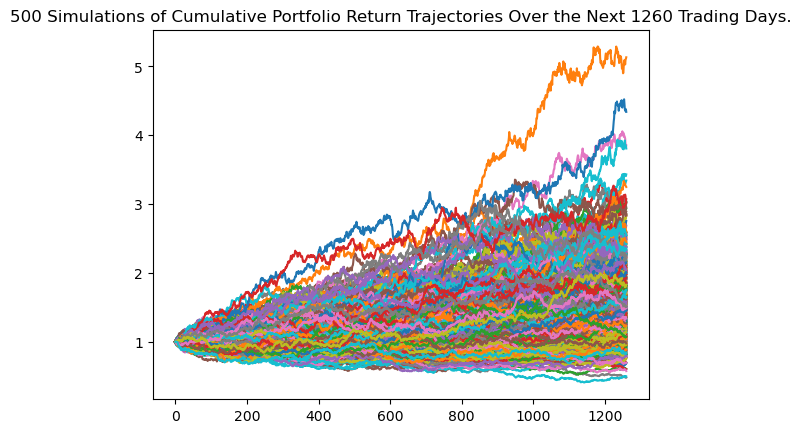

In [102]:
# Plot simulation outcomes
MC_5years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

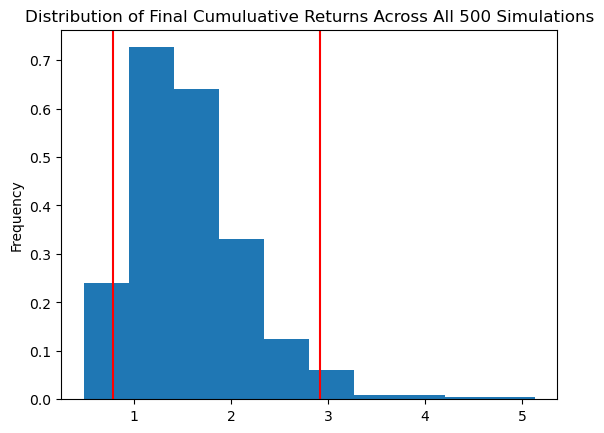

In [103]:
# Plot probability distribution and confidence intervals
MC_5years.plot_distribution()

In [113]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5years_summary = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(MC_5years_summary)

count           500.000000
mean              1.581181
std               0.593857
min               0.480268
25%               1.177518
50%               1.471675
75%               1.883177
max               5.132599
95% CI Lower      0.775122
95% CI Upper      2.913380
Name: 1260, dtype: float64


In [114]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = initial_investment*MC_5years_summary[8]
ci_upper_five = initial_investment*MC_5years_summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46507.33576888701 and $174802.7836463181


### Ten Years Retirement Option

In [107]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.25,0.75],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [108]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010604,0.996154,1.000581,0.988563,0.983492,1.011594,1.011638,1.002646,1.010177,0.989428,...,0.994076,0.997806,1.005026,1.015117,0.988578,1.008866,1.008255,1.008925,0.997825,0.999773
2,1.012733,0.994602,1.018213,0.995222,0.991957,1.014533,1.022398,0.989325,0.984026,0.987558,...,1.007931,1.001078,1.010201,1.017398,1.002578,1.021201,1.014380,1.004841,1.005274,0.987054
3,1.010361,1.000363,1.012919,1.011000,0.995356,1.019128,1.030714,0.997704,0.995565,0.988068,...,0.994373,0.999175,1.012758,1.016973,0.984999,1.011734,1.011847,1.007634,1.008081,0.988475
4,1.008844,0.990617,1.023718,1.013480,0.993439,1.019647,1.045522,1.009012,0.999788,0.987965,...,0.973176,0.997346,0.997111,1.013119,1.003418,0.987196,1.018283,1.005750,1.023184,0.986158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.087298,2.421375,0.589468,2.890747,2.077921,2.425786,1.965088,6.178969,4.725009,2.009581,...,2.222097,2.027050,2.192179,1.843290,3.259157,1.422942,1.750604,3.129447,2.099325,4.741393
2517,4.090356,2.434639,0.599697,2.904967,2.092192,2.412024,1.973260,6.072706,4.639059,2.039292,...,2.267541,2.052196,2.144478,1.873349,3.267329,1.397564,1.744579,3.203152,2.120241,4.684422
2518,4.109531,2.458198,0.592920,2.906983,2.092026,2.417613,2.007879,6.070947,4.672692,2.048822,...,2.255189,2.046486,2.142680,1.875722,3.271227,1.399459,1.708205,3.177147,2.122260,4.728304
2519,4.126622,2.509500,0.591937,2.934782,2.099449,2.394169,2.019157,6.073496,4.662852,2.041230,...,2.267116,2.035965,2.160296,1.884964,3.262437,1.409554,1.690234,3.208464,2.136057,4.734025


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

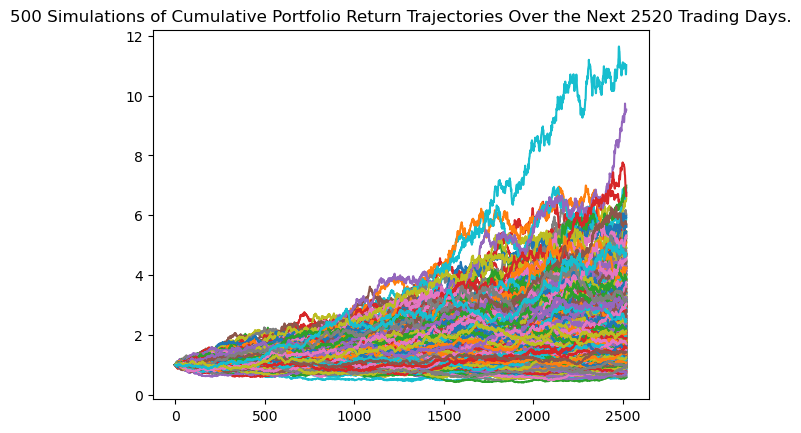

In [109]:
# Plot simulation outcomes
MC_10years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

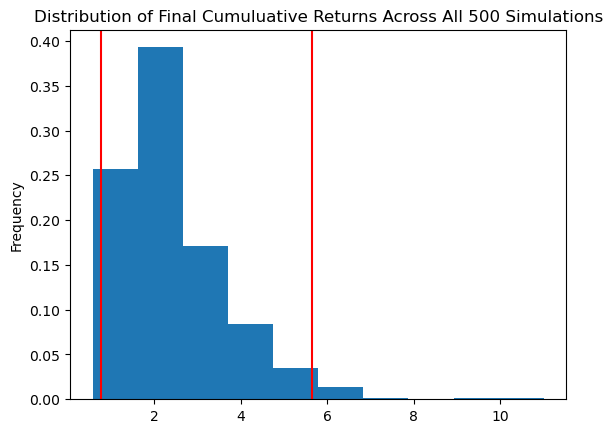

In [110]:
# Plot probability distribution and confidence intervals
MC_10years.plot_distribution()

In [115]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10years_summary = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MC_10years_summary)

count           500.000000
mean              2.441692
std               1.309530
min               0.576885
25%               1.540514
50%               2.120268
75%               3.044259
max              11.011422
95% CI Lower      0.771763
95% CI Upper      5.642460
Name: 2520, dtype: float64


In [116]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment * MC_10years_summary[8]
ci_upper_ten = initial_investment * MC_10years_summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $46305.80254215759 and $338547.57871210994
